# Week 2

In [2]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

## Part 1: Mean, Variance, Linear Regression, Fitted line

In [5]:
data1 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
data2 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv'
data3 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv'
data4 = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'
df1 = pd.read_csv(data1, sep='\t', header=None, names=['x', 'y'])
df2 = pd.read_csv(data2, sep='\t', header=None, names=['x', 'y'])
df3 = pd.read_csv(data3, sep='\t', header=None, names=['x', 'y'])
df4 = pd.read_csv(data4, sep='\t', header=None, names=['x', 'y'])

df_lst = [df1, df2, df3, df4]

In [6]:
# Calculate the means
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} x-mean: {np.mean(df['x']):.2f} | y-mean: {np.mean(df['y']):.2f}")

Dataset 1 x-mean: 9.00 | y-mean: 7.50
Dataset 2 x-mean: 9.00 | y-mean: 7.50
Dataset 3 x-mean: 9.00 | y-mean: 7.50
Dataset 4 x-mean: 9.00 | y-mean: 7.50


In [7]:
# Calculate the variances 
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} x-var: {np.var(df['x']):.3f} | y-var: {np.var(df['y']):.3f}")

Dataset 1 x-var: 10.000 | y-var: 3.752
Dataset 2 x-var: 10.000 | y-var: 3.752
Dataset 3 x-var: 10.000 | y-var: 3.748
Dataset 4 x-var: 10.000 | y-var: 3.748


In [8]:
# calculate the Pearson correlation between x and y values for all four data sets  
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} pearson correlation between x and y: {np.corrcoef(df['x'], df['y'])[0, 1]:.3f}")

Dataset 1 pearson correlation between x and y: 0.816
Dataset 2 pearson correlation between x and y: 0.816
Dataset 3 pearson correlation between x and y: 0.816
Dataset 4 pearson correlation between x and y: 0.817


In [9]:
# Calculate Linear Regression Parameters 
lr_lst = []
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1}")
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])
    print(f"y = {slope:.2f}x + {intercept:.2f}")
    
    lr_lst.append(lambda x: slope * x + intercept)


Dataset 1
y = 0.50x + 3.00
Dataset 2
y = 0.50x + 3.00
Dataset 3
y = 0.50x + 3.00
Dataset 4
y = 0.50x + 3.00


**Comment: We observe that the statistical measures are almost exactly the same for all datasets. The straight line (linear regression) fit also provided the same line for each dataset.**

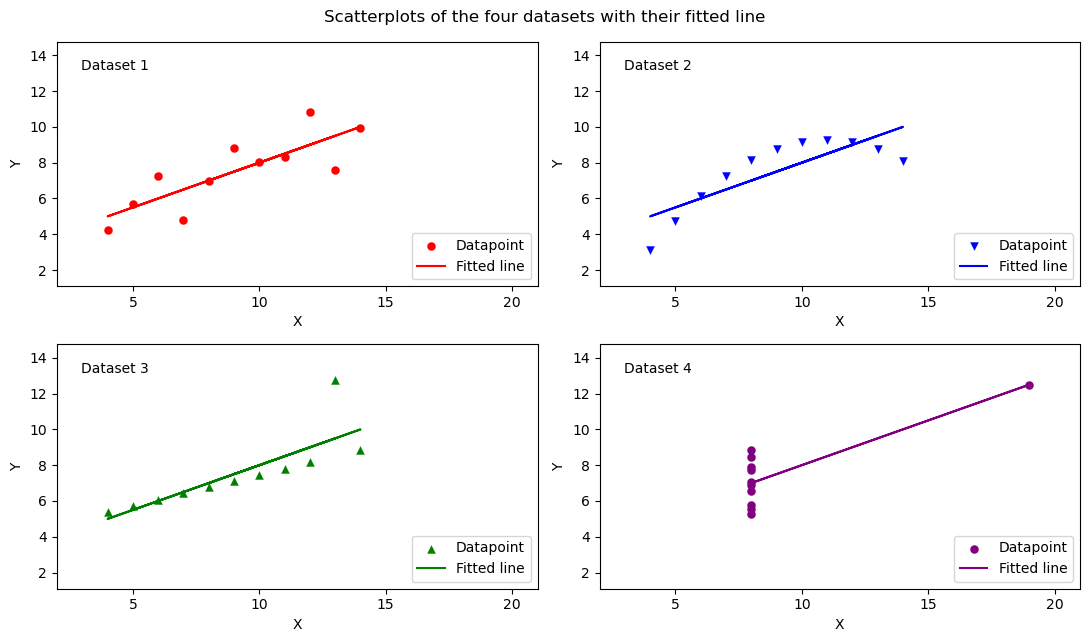

In [12]:
titles = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4"]
markers = ["o", "v", "^", "o"]
colors = ["red", "blue", "green", "purple"]
labels = ['Datapoint', 'Datapoint', 'Datapoint', 'Datapoint']

x_min = min(min(data['x']) for data in df_lst)
x_max = max(max(data['x']) for data in df_lst)
y_min = min(min(data['y']) for data in df_lst)
y_max = max(max(data['y']) for data in df_lst)


fig = plt.figure(figsize = (11,6.5))

for i, data in enumerate(df_lst):

    #Creating a subplot spaceholder 
    ax = fig.add_subplot(2, 2, i+1)

    # Scatter plot
    plt.scatter(data['x'], data['y'], marker = markers[i], color = colors[i], linewidths=0.1, label = labels[i])

    # Regression line 
    a, b = np.polyfit(data['x'], data['y'], 1)
    plt.plot(data['x'], data['x']*a+b, color = colors[i], label = f"Fitted line")

    # Legend
    ax.legend(loc = 4)

    # Set subplots titles     
    ax.set_title(titles[i], x = 0.05, y=0.85,  loc = "left", fontsize =10) # set indentation 'left' and x, y added/subtracted, compared to the default values
    
    # Set x,y axes numbering
    plt.xticks(np.arange(0, x_max+2, 5))
    plt.yticks(np.arange(0, y_max+2, 2))

    # Set x and y limits 
    ax.set_xlim(x_min-2, x_max+2)
    ax.set_ylim(y_min-2, y_max+2)

    # Set x and y labels 
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Make space between the different rows of plots 
    plt.subplots_adjust(hspace = 0.2, wspace = 0.2) 

    # set the inner margins between plot values and plot
    plt.margins(y = 0.55, x = 0.05) 

    fig.suptitle('Scatterplots of the four datasets with their fitted line')

    fig.tight_layout()

**Comment: The point of the exercise is to show that even if all the numbers indicate that this is the SAME dataset. When we visualize the datapoints, we quickly see that the datasets are NOT the same. Actually they differ quite significantly from each other. Therefore, it is not enough to just look at the statistical measures to identify and explain datasets but we must also use qualitative visualization techniques.**

## Part 2: Visualizing patterns in the data

In [4]:
df = pd.read_csv('crime.csv') # load the csv data into pandas dataframe  

In [5]:
# Add a year column based on the Date column 
df['Year'] = df.Date.apply(lambda date : date.split("/")[2])

In [6]:
# Drop observations for year 2018 due to missing data
year_index = df[df.Year == "2018"].index
df.drop(year_index, inplace = True)

In [7]:
# Focuscrimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

### Week - day plots

In [8]:
# Add a day column 
Day = pd.to_datetime(df.Date).dt.day_name() 

# Grouping by focus crime - day and reindexing from monday to Sunday
days = list(calendar.day_name)
group_day = df[df.Category.isin(focuscrimes)].groupby([ Day, 'Category']).size().unstack().reindex(days)

/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_32884/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_32884/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_32884/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_32884/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_32884/1624187182.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(' ')
/var/folders/h6/f8twklt56rdg96n68wjjppdm0000gn/T/ipykernel_32884/1624187182.py:1

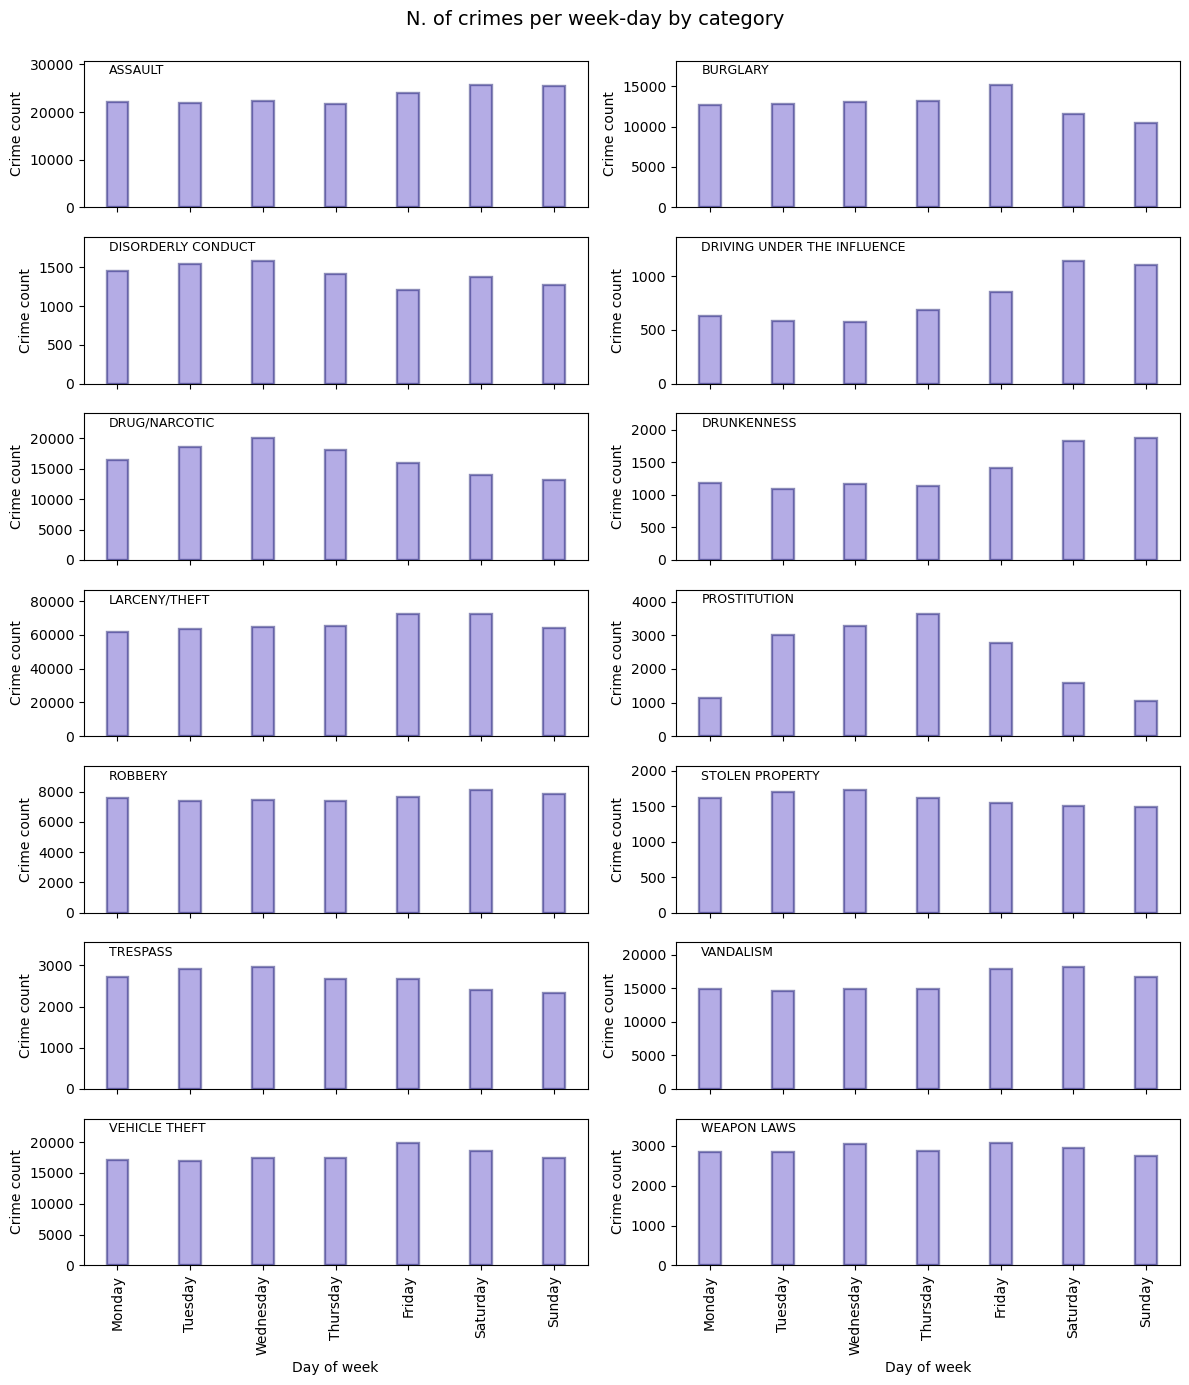

In [9]:
fig = plt.figure(figsize = (12, 15))

for i, crime in enumerate(group_day):

    # Creating a subplot spaceholder
    ax = fig.add_subplot(7, 2, i+1)

    # Plot values and attributes 
    plt.bar(group_day.index, group_day[crime],width=0.3, color = 'slateblue', alpha = 0.5, edgecolor = "midnightblue", linewidth = 1.7)

    # Set subplots titles     
    ax.set_title(group_day.columns[i], x = 0.05, y = 0.85, loc = 'left', fontsize = 9)  # set indentation 'left' and x, y added/subtracted, compared to the default values

    # X-axis ticks
    if i < (len(focuscrimes)-2):   # If the plot is not on the last row, don't show its x-axis ticks
        ax.set_xticklabels(' ')

    # X-axis labels
    if i >= (len(focuscrimes)-2):  # If plot is not on the last row, don't show its x-axis label
        plt.xlabel('Day of week')
    
    # Rotation of x-axis ticks
    plt.xticks(rotation = 90)   

    # Y-axis labels
    ax.set_ylabel('Crime count')

    # Set y limits 
    ax.set_ylim(0, group_day[crime].max()*1.2)
    
    fig.suptitle('N. of crimes per week-day by category', y = 0.95, fontsize = 14)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])